In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. IRIS Dataset - KNN Classifier
print("\n--- IRIS DATASET ---")

# Load IRIS dataset
iris_df = pd.read_csv('/content/iris.csv')

# Features and labels
X_iris = iris_df.drop('species', axis=1)
y_iris = iris_df['species']

# Train-test split
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Create KNN model (let's use k=3 here)
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train_i, y_train_i)

# Predictions
y_pred_i = knn_iris.predict(X_test_i)

# Evaluation
print("Accuracy:", accuracy_score(y_test_i, y_pred_i))
print("Confusion Matrix:\n", confusion_matrix(y_test_i, y_pred_i))
print("Classification Report:\n", classification_report(y_test_i, y_pred_i))


# 2. DIABETES Dataset - KNN Classifier with Scaling
print("\n--- DIABETES DATASET ---")

# Load Diabetes dataset
diabetes_df = pd.read_csv('/content/diabetes.csv')

# Features and labels
X_dia = diabetes_df.drop('Outcome', axis=1)
y_dia = diabetes_df['Outcome']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dia)

# Train-test split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_scaled, y_dia, test_size=0.2, random_state=42)

# Create KNN model (using k=5)
knn_dia = KNeighborsClassifier(n_neighbors=5)
knn_dia.fit(X_train_d, y_train_d)

# Predictions
y_pred_d = knn_dia.predict(X_test_d)

# Evaluation
print("Accuracy:", accuracy_score(y_test_d, y_pred_d))
print("Confusion Matrix:\n", confusion_matrix(y_test_d, y_pred_d))
print("Classification Report:\n", classification_report(y_test_d, y_pred_d))


--- IRIS DATASET ---
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- DIABETES DATASET ---
Accuracy: 0.6883116883116883
Confusion Matrix:
 [[79 20]
 [28 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



Best k value: 16
Accuracy: 0.8852459016393442


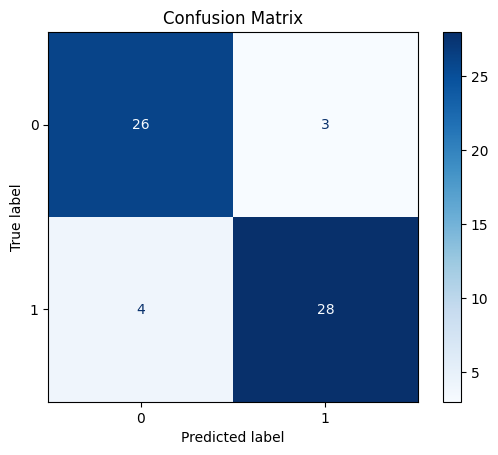

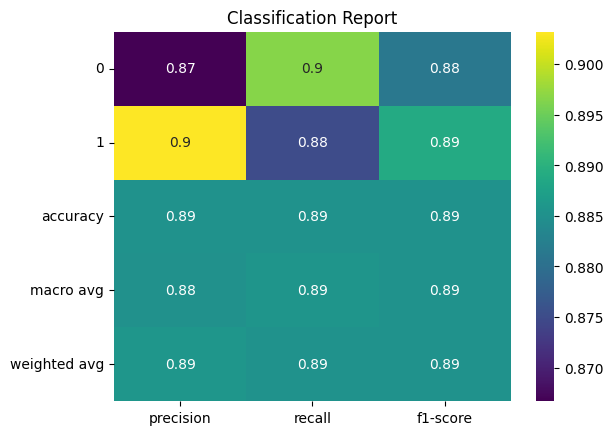

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load heart dataset
heart_df = pd.read_csv('/content/heart.csv')

# Features and target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find best k using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

best_k = grid.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# Train KNN with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", knn.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='viridis')
plt.title("Classification Report")
plt.show()
